In [439]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack


In [440]:
def noise_out(time_counts):
    return 2 * np.sin(2 * np.pi * 50 * time_counts)

In [441]:
def noise_in(time_counts):
    return 0.5 * noise_out(time_counts)

In [442]:
def useful_signal(time_counts):
    return 10 * np.sin(2 * np.pi * 1 * time_counts)

In [443]:
right_bound = 10
number_of_point = 20000
t = np.linspace(0, right_bound, number_of_point, endpoint=False)

first_input = noise_out(t)
second_output = noise_in(t) + useful_signal(t)

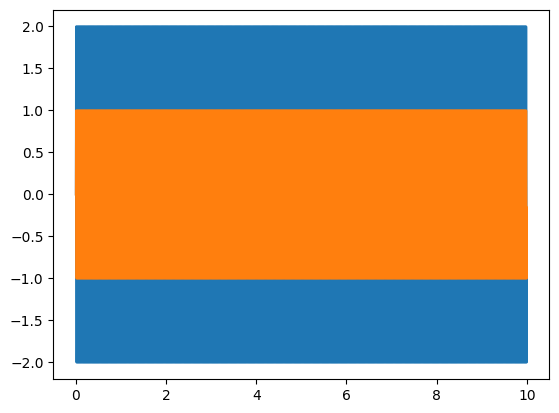

In [444]:
plt.plot(t, noise_out(t))
plt.plot(t, noise_in(t))
plt.show()

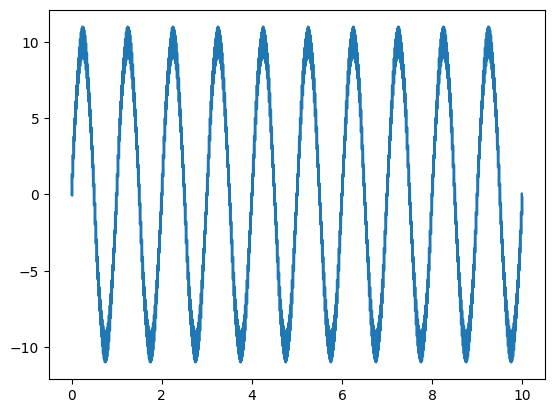

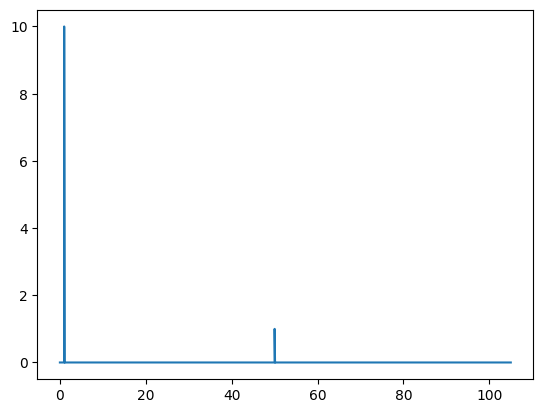

In [445]:
plt.plot(t, second_output)
plt.show()

freq_bound = 2100
plt.plot(fftpack.rfftfreq(second_output.size, right_bound / number_of_point)[:freq_bound], 2 * np.abs(fftpack.rfft(second_output)[:freq_bound]) / second_output.size)
plt.show()

Определим длину вектора высовых коэффициентов свертки

In [446]:
number_of_weights = 1

In [447]:
# weights = np.random.random(number_of_weights)
weights = np.ones(number_of_weights)

In [448]:
mu_0 = 1
epsilon = 1

In [449]:
print(weights)

for i in range(len(second_output[number_of_weights - 1:])):
    first_input_k = first_input[i:number_of_weights + i]
    second_output_k = second_output[i + number_of_weights - 1]

    mu_k = mu_0 / ((first_input_k ** 2).sum() + epsilon)
    # mu_k = 0.01

    p = second_output_k * first_input_k

    r = np.empty((number_of_weights, number_of_weights))

    for i in range(number_of_weights):
        for j in range(number_of_weights):
            r[i, j] = first_input_k[i] * first_input_k[j]

    grad_J = -2 * (p - r.dot(weights))

    weights -= mu_k * grad_J

print(weights)

[1.]
[0.60231708]


In [450]:
def processing_of_signal(input, weights):
    output = np.zeros_like(input)
    number_of_weights = weights.size

    for i in range(output.size - number_of_weights + 1):
        output[number_of_weights - 1 + i] = (input[i:number_of_weights + i] * weights).sum()

    return output

In [451]:
all_spectrum = np.zeros(t.size)
all_spectrum[int(t.size / 2)] = 1

In [452]:
approx_noise_in = processing_of_signal(first_input, weights)

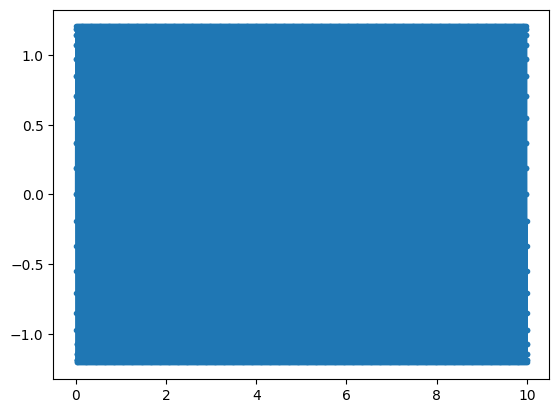

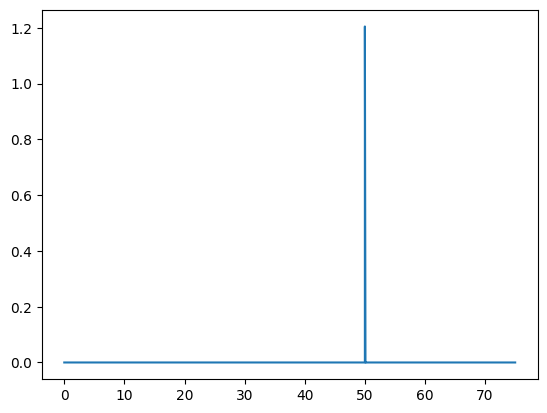

In [453]:
plt.plot(t, approx_noise_in, ".-")
plt.show()

freq_bound = 1500

x = fftpack.rfftfreq(approx_noise_in.size, right_bound / number_of_point)[:freq_bound]
y = 2 * np.abs(fftpack.rfft(approx_noise_in)[:freq_bound]) / approx_noise_in.size

plt.plot(x, y)
plt.show()